<a href="https://colab.research.google.com/github/Norah-Martin/Norah-Martin/blob/project/Miniproj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import unique,argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import  plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#loading the MNIST dataset
(x_train,y_train),(x_test,y_test) = load_data()
#reshaping the training and testing data
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test  = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

In [4]:
#normalizing the values of pixels of images
x_train = x_train.astype('float32') /255.0
x_test  = x_test.astype('float32') /255.0

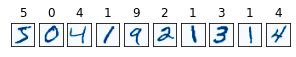

In [66]:
fig = plt.figure(figsize=(5,3))
for i in range(10):
  ax = fig.add_subplot(3,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap ='Blues')
  ax.set_title(y_train[i])

In [28]:
# determine the shape of the input images
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [41]:
#defining the model
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=img_shape))
model.add(MaxPool2D((2,3)))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [42]:
model.summary()#to check the model summary

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 8, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 6, 48)         13872     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 3, 48)         0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 5, 3, 48)          0         
                                                                 
 flatten_8 (Flatten)         (None, 720)             

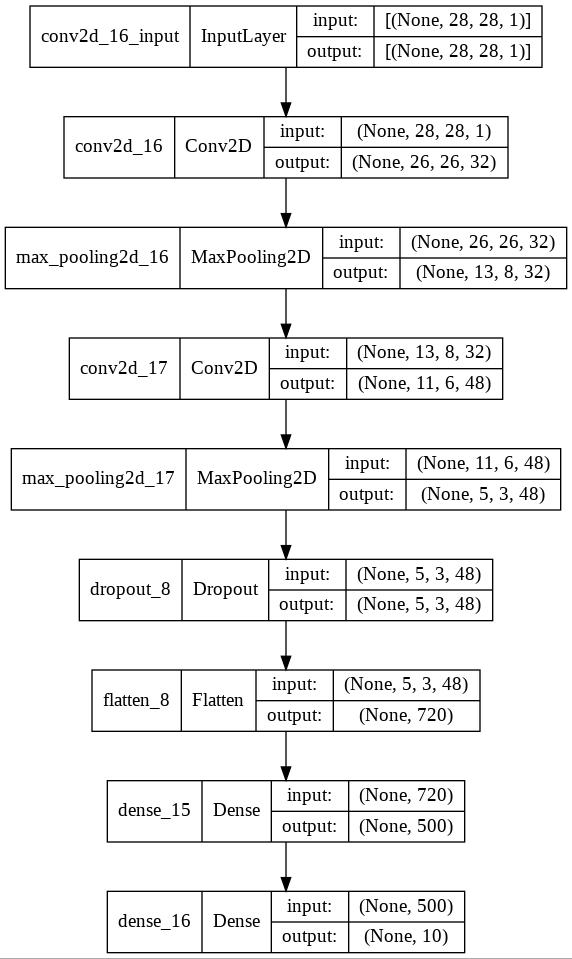

In [43]:
plot_model(model,'model.jpg',show_shapes=True)

In [44]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
x = model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 30s - loss: 0.2961 - accuracy: 0.9071 - val_loss: 0.0571 - val_accuracy: 0.9832 - 30s/epoch - 71ms/step
Epoch 2/10
422/422 - 29s - loss: 0.0940 - accuracy: 0.9703 - val_loss: 0.0417 - val_accuracy: 0.9882 - 29s/epoch - 68ms/step
Epoch 3/10
422/422 - 29s - loss: 0.0714 - accuracy: 0.9771 - val_loss: 0.0329 - val_accuracy: 0.9908 - 29s/epoch - 69ms/step
Epoch 4/10
422/422 - 29s - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.0330 - val_accuracy: 0.9910 - 29s/epoch - 69ms/step
Epoch 5/10
422/422 - 29s - loss: 0.0511 - accuracy: 0.9835 - val_loss: 0.0298 - val_accuracy: 0.9915 - 29s/epoch - 68ms/step
Epoch 6/10
422/422 - 29s - loss: 0.0452 - accuracy: 0.9854 - val_loss: 0.0308 - val_accuracy: 0.9910 - 29s/epoch - 68ms/step
Epoch 7/10
422/422 - 29s - loss: 0.0397 - accuracy: 0.9869 - val_loss: 0.0263 - val_accuracy: 0.9927 - 29s/epoch - 68ms/step
Epoch 8/10
422/422 - 29s - loss: 0.0360 - accuracy: 0.9879 - val_loss: 0.0272 - val_accuracy: 0.9920 - 29s/epoch - 68ms/step


In [45]:
loss,accuracy = model.evaluate(x_test,y_test,verbose=10)
print(f'Accuracy:{accuracy*100}')


Accuracy:99.23999905586243


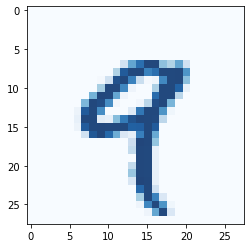

In [67]:
image = x_train[4]
#lets display the image which we want to predict
plt.imshow(np.squeeze(image),cmap='Blues',alpha=1.9)
plt.show()

In [68]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p = model.predict([image])
print('predicted:{}'.format(argmax(p)))

predicted:9
